In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [4]:
df = pd.read_csv("supermarket_sales.csv") 

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,NaN,Yangon,Member,NaN,Health and beauty,74.69,NaN,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,NaN,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,NaN,Sports and travel,86.31,7.0,30.2085,634.3785,02/08/2019,Ewallet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1013 non-null   object 
 1   Branch         1009 non-null   object 
 2   City           1009 non-null   object 
 3   Customer type  1013 non-null   object 
 4   Gender         1007 non-null   object 
 5   Product line   1013 non-null   object 
 6   Unit price     1013 non-null   float64
 7   Quantity       1008 non-null   float64
 8   Tax 5%         1013 non-null   float64
 9   Total          1011 non-null   float64
 10  Date           1013 non-null   object 
 11  Payment        1013 non-null   object 
dtypes: float64(4), object(8)
memory usage: 95.1+ KB


<Axes: xlabel='Date', ylabel='Total'>

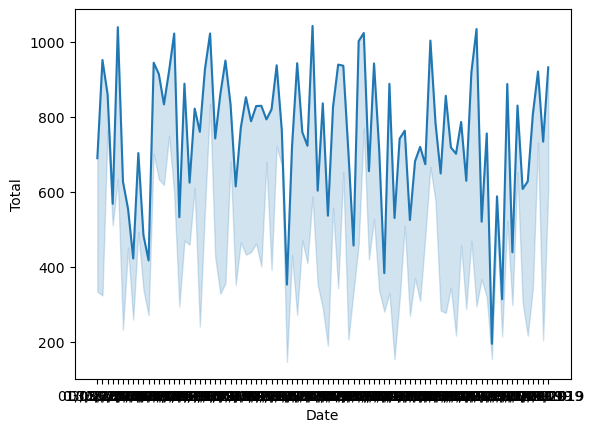

In [17]:
# from collections import Counter 
sns.lineplot(data = df , x = "Date" , y = "Total" , estimator="max")

In [19]:
group = df.groupby("Date")["Total"].agg(["min" , "max" , "mean" , "sum" , "count"])

In [23]:
group.columns

Index(['min', 'max', 'mean', 'sum', 'count'], dtype='object')

In [25]:
for i in group.columns:
    fig = px.line(group , x = group.index , y = i , title=f"{i} Invoice")
    fig.show()

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1013 non-null   object        
 1   Branch         1009 non-null   object        
 2   City           1009 non-null   object        
 3   Customer type  1013 non-null   object        
 4   Gender         1007 non-null   object        
 5   Product line   1013 non-null   object        
 6   Unit price     1013 non-null   float64       
 7   Quantity       1008 non-null   float64       
 8   Tax 5%         1013 non-null   float64       
 9   Total          1011 non-null   float64       
 10  Date           1013 non-null   datetime64[ns]
 11  Payment        1013 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 95.1+ KB


In [31]:
df["Day"] =  df["Date"].dt.day
df["Month"] =  df["Date"].dt.month
df["Year"] =  df["Date"].dt.year

In [33]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,Day,Month,Year
0,750-67-8428,NaN,Yangon,Member,NaN,Health and beauty,74.69,NaN,26.1415,548.9715,2019-01-05,Ewallet,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,NaN,2019-03-08,Cash,8,3,2019


<Axes: xlabel='Month', ylabel='Total'>

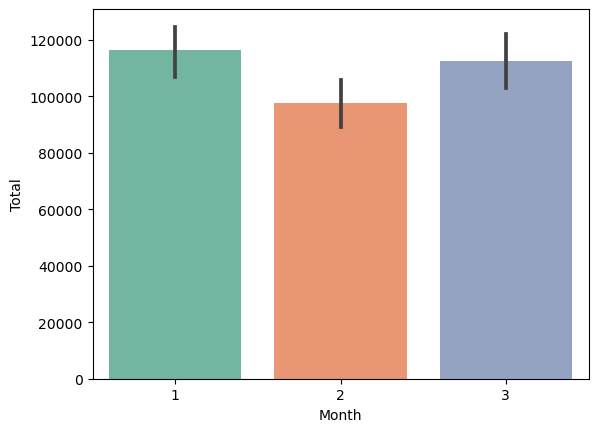

In [39]:
sns.barplot(data = df , x = "Month" , y = "Total" , estimator="sum" ,palette="Set2" )